Epoch  0: w=5.00 b=-2.00, loss=38.50000
Epoch  1: w=2.48 b=-2.63, loss=1.50010
Epoch  2: w=2.47 b=-2.47, loss=1.22548
Epoch  3: w=2.43 b=-2.33, loss=1.00833
Epoch  4: w=2.39 b=-2.21, loss=0.82967
Epoch  5: w=2.35 b=-2.09, loss=0.68266
Epoch  6: w=2.32 b=-1.99, loss=0.56169
Epoch  7: w=2.29 b=-1.90, loss=0.46217
Epoch  8: w=2.26 b=-1.82, loss=0.38027
Epoch  9: w=2.24 b=-1.74, loss=0.31289
Epoch 10: w=2.22 b=-1.67, loss=0.25745
Epoch 11: w=2.20 b=-1.61, loss=0.21183
Epoch 12: w=2.18 b=-1.55, loss=0.17430
Epoch 13: w=2.16 b=-1.50, loss=0.14341
Epoch 14: w=2.15 b=-1.46, loss=0.11800
Epoch 15: w=2.13 b=-1.41, loss=0.09709
Epoch 16: w=2.12 b=-1.37, loss=0.07989
Epoch 17: w=2.11 b=-1.34, loss=0.06573
Epoch 18: w=2.10 b=-1.31, loss=0.05409
Epoch 19: w=2.09 b=-1.28, loss=0.04450
Epoch 20: w=2.08 b=-1.25, loss=0.03662
Epoch 21: w=2.07 b=-1.23, loss=0.03013
Epoch 22: w=2.07 b=-1.21, loss=0.02479
Epoch 23: w=2.06 b=-1.19, loss=0.02040
Epoch 24: w=2.06 b=-1.17, loss=0.01678
Epoch 25: w=2.05 b=-1.16

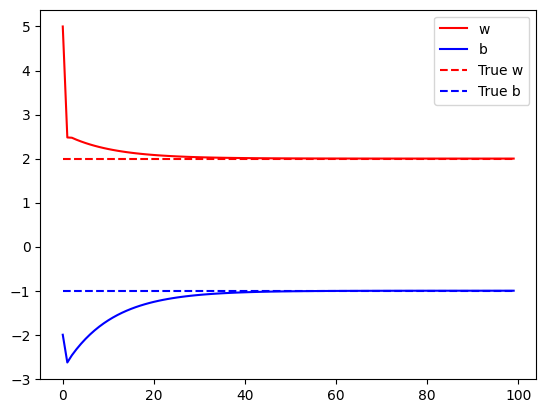

In [1]:
# First import the functions we will need
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# This script requires TensorFlow 2 and Python 3.
if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))

# Define our initial guess
INITIAL_W = 5.0
INITIAL_B = -2.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.09

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(100)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print(f"Epoch {epoch:2d}: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, "
        f"loss={current_loss:2.5f}")

# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()